In [163]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import random

In [164]:
# Функция для генерации случайной даты
def random_date(start, end):
 return start + timedelta(
 seconds=random.randint(0, int((end - start).total_seconds()))
 )

Создание файла CSV со списком акций компаний
- поля: id компании, название компании, стоимость акции
- 100 строк
- ключевое поле связки - id компании

In [165]:
companies = []
for i in range(100): # Генерируем 100 продуктов
 company = {
 'company_id': f'P{i:03d}',
 'company_name': f'Компания {i}',
 'price': round(random.uniform(10, 1000), 2)
 }
 companies.append(company)

In [166]:
df_companies = pd.DataFrame(companies)
df_companies.to_csv('companies.csv', index=False)
print("Файл companies.csv создан")

Файл companies.csv создан


Создание файла EXCEL с количеством сделок:
- поля: id компании, название компании, дата сделки, количество проданных акций
- записей больше, количество компаний то же, что и в файле CSV
- количество проданных акций варьируется от 1 до 500

In [167]:
sales = []
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
for _ in range(10000): # Генерируем 10000 записей о продажах
 company = random.choice(companies)
 sale = {
 'date': random_date(start_date, end_date).strftime('%Y-%m-%d'),
 'company_id': company['company_id'],
 'quantity': random.randint(1, 500)}
 sales.append(sale)

In [168]:
df_sales = pd.DataFrame(sales)
df_sales.to_excel('sales.xlsx', index=False)
print("Файл sales.xlsx создан")

Файл sales.xlsx создан


Создание файла JSON с данными о прогнозе изменения стоимости акций:

поля: id компании, название компании, прогноз (число от -1000 до 1000, соответствует цене падения или поднятия акции компании)


In [169]:
prognostications = []
for i in range(100): # Генерируем 100 прогнозов
 prognostication = {
 'company_id': f'P{i:03d}',
 'prognost': round(random.uniform(-1000, 1000), 2)
 }
 prognostications.append(prognostication)

In [170]:
with open('prognostications.json', 'w', encoding='utf-8') as f:
 json.dump(prognostications, f, ensure_ascii=False, indent=4)

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [172]:
df_companies = pd.read_csv('companies.csv')
print("Данные об акциях компаний:")
print(df_companies.head())

Данные об акциях компаний:
  company_id company_name   price
0       P000   Компания 0  627.33
1       P001   Компания 1   94.38
2       P002   Компания 2  146.63
3       P003   Компания 3  246.43
4       P004   Компания 4  489.03


In [173]:
df_sales = pd.read_excel('sales.xlsx')
print("\nДанные о продажах акций:")
print(df_sales.head())


Данные о продажах акций:
         date company_id  quantity
0  2023-08-15       P078        27
1  2023-04-16       P053       176
2  2023-07-13       P038       262
3  2023-01-12       P075       179
4  2023-01-10       P005        97


In [174]:
df_prognostications = pd.read_json('prognostications.json')
print("\nДанные о прогнозах цен акций:")
print(df_prognostications.head())


Данные о прогнозах цен акций:
  company_id  prognost
0       P000    481.16
1       P001    879.04
2       P002   -967.82
3       P003    945.98
4       P004   -337.15


In [175]:
print("\nПропущенные значения:")
print(df_companies.isnull().sum())
print(df_sales.isnull().sum())
print(df_prognostications.isnull().sum())


Пропущенные значения:
company_id      0
company_name    0
price           0
dtype: int64
date          0
company_id    0
quantity      0
dtype: int64
company_id    0
prognost      0
dtype: int64


In [176]:
df_sales.columns = df_sales.columns.str.lower()
df_prognostications.columns = df_prognostications.columns.str.lower()
df_companies.columns = df_companies.columns.str.lower()

In [177]:
df_consolidated2 = pd.merge(df_companies, df_prognostications, on='company_id', how='left')
print("\nКонсолидированные данные:")
print(df_consolidated2.head(20))


Консолидированные данные:
   company_id company_name   price  prognost
0        P000   Компания 0  627.33    481.16
1        P001   Компания 1   94.38    879.04
2        P002   Компания 2  146.63   -967.82
3        P003   Компания 3  246.43    945.98
4        P004   Компания 4  489.03   -337.15
5        P005   Компания 5  544.26    575.97
6        P006   Компания 6  742.71    308.21
7        P007   Компания 7  127.42   -451.54
8        P008   Компания 8  420.03    -84.64
9        P009   Компания 9  895.27    128.20
10       P010  Компания 10  663.43   -489.18
11       P011  Компания 11  737.87    938.64
12       P012  Компания 12  373.99    385.34
13       P013  Компания 13  867.70   -337.71
14       P014  Компания 14  575.28    -70.35
15       P015  Компания 15  658.77    865.50
16       P016  Компания 16  967.26   -644.67
17       P017  Компания 17  799.79   -811.37
18       P018  Компания 18  841.08    597.47
19       P019  Компания 19   37.92    381.49


In [178]:
df_consolidated = pd.merge(df_consolidated2, df_sales, on='company_id', how='left')
print("\nКонсолидированные данные:")
print(df_consolidated.head(20))


Консолидированные данные:
   company_id company_name   price  prognost        date  quantity
0        P000   Компания 0  627.33    481.16  2023-10-06       260
1        P000   Компания 0  627.33    481.16  2023-08-25       131
2        P000   Компания 0  627.33    481.16  2023-05-15       324
3        P000   Компания 0  627.33    481.16  2023-11-08        95
4        P000   Компания 0  627.33    481.16  2023-04-30       323
5        P000   Компания 0  627.33    481.16  2023-04-30       396
6        P000   Компания 0  627.33    481.16  2023-08-23       372
7        P000   Компания 0  627.33    481.16  2023-09-15       460
8        P000   Компания 0  627.33    481.16  2023-11-05       366
9        P000   Компания 0  627.33    481.16  2023-05-23       202
10       P000   Компания 0  627.33    481.16  2023-09-04       427
11       P000   Компания 0  627.33    481.16  2023-12-13        86
12       P000   Компания 0  627.33    481.16  2023-03-30       264
13       P000   Компания 0  627.33 

In [182]:
df_consolidated['sales'] = df_consolidated['quantity'] * df_consolidated['price']
df_consolidated.head()


,company_id,company_name,price,prognost,date,quantity,sales
0,P000,Компания 0,627.33,481.16,2023-10-06,260,163105.80
1,P000,Компания 0,627.33,481.16,2023-08-25,131,82180.23
2,P000,Компания 0,627.33,481.16,2023-05-15,324,203254.92
3,P000,Компания 0,627.33,481.16,2023-11-08,95,59596.35
4,P000,Компания 0,627.33,481.16,2023-04-30,323,202627.59


In [184]:
sales_by_company = df_consolidated.groupby('company_id')['sales'].sum().sort_values(ascending=False)
print("\nОбщая сумма продаж по компаниям:")
print(sales_by_company)



Общая сумма продаж по компаниям:
company_id
P016    33020321.88
P038    30824503.82
P068    28642734.48
P067    25962364.70
P022    25316878.09
           ...     
P032     1100447.14
P095      865763.28
P019      811639.68
P034      691545.60
P069      472080.72
Name: sales, Length: 100, dtype: float64


In [185]:
df_consolidated['month'] = pd.to_datetime(df_consolidated['date']).dt.month

In [186]:
avg_sales_by_month = df_consolidated.groupby('month')['sales'].mean()
print("\nСредняя сумма продаж по месяцам:")
print(avg_sales_by_month)



Средняя сумма продаж по месяцам:
month
1     132335.431967
2     131782.238737
3     135040.014042
4     139449.927880
5     143409.755146
6     137624.288878
7     130328.717993
8     136593.969540
9     133418.318198
10    134939.212151
11    129698.247152
12    131403.817222
Name: sales, dtype: float64


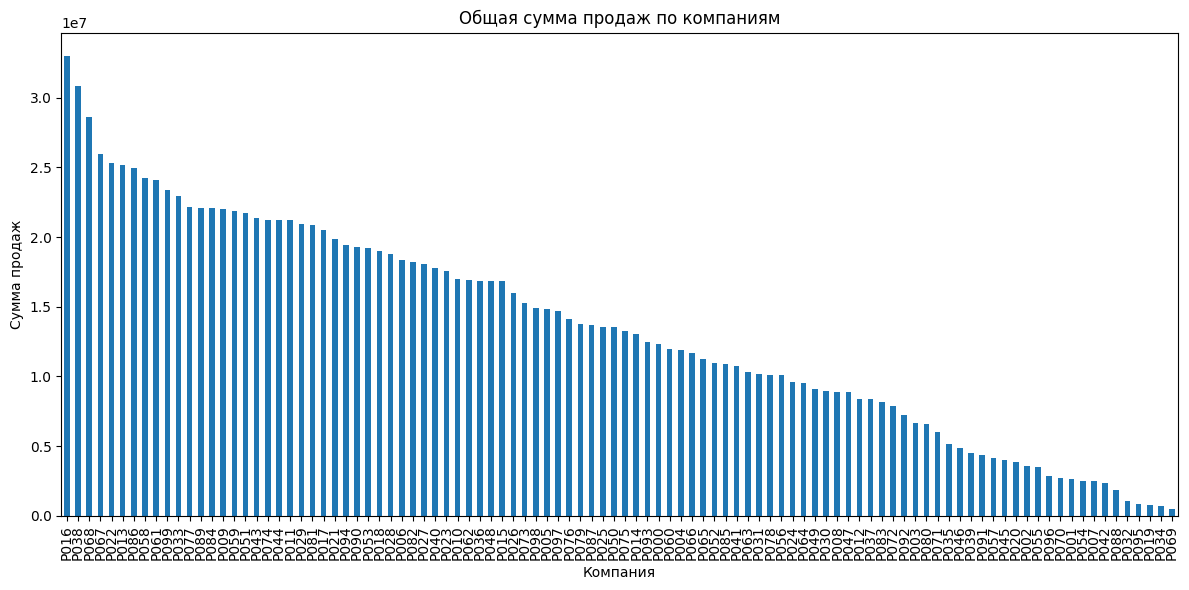

In [187]:
plt.figure(figsize=(12, 6))
sales_by_company.plot(kind='bar')
plt.title('Общая сумма продаж по компаниям')
plt.xlabel('Компания')
plt.ylabel('Сумма продаж')
plt.tight_layout()
plt.savefig('sales_by_company.png')


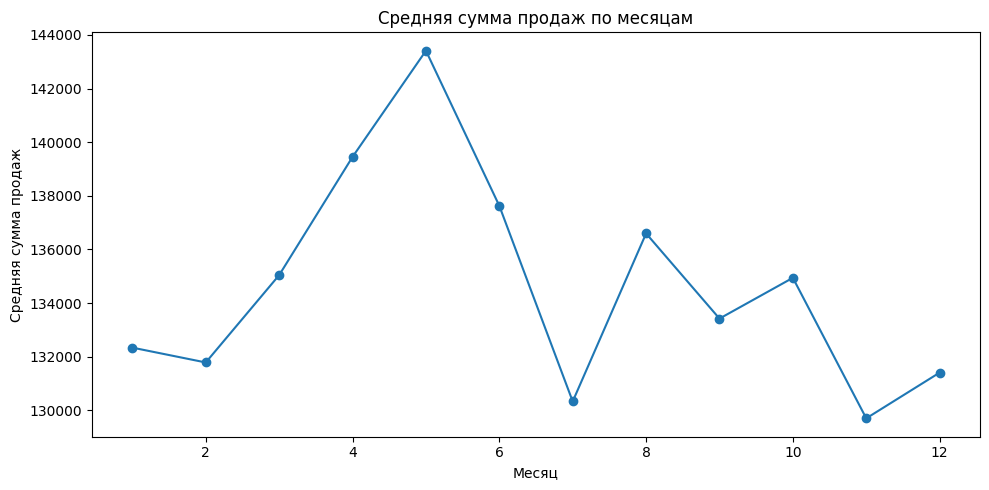

In [188]:
plt.figure(figsize=(10, 5))
avg_sales_by_month.plot(kind='line', marker='o')
plt.title('Средняя сумма продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя сумма продаж')
plt.tight_layout()
plt.savefig('avg_sales_by_month.png')

In [190]:
df_consolidated.to_csv('consolidated_sales_data.csv', index=False)
